In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
# Check running on Tensorflow version 2+
tf.__version__

'2.2.0-rc4'

In [3]:
# Check running on Keras version 2+ as well
keras.__version__

'2.3.0-tf'

#### Building an Image Classifier using the Seuential API

In [4]:
# Fetch and load the fashion MNIST dataset
fashion_mnist = keras.datasets.fashion_mnist

# Split into training and testing set when loading the data
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [5]:
X_train_full.shape

(60000, 28, 28)

In [6]:
X_train_full.dtype

dtype('uint8')

Each image in the data is represented as a 28 by 28 array (unlike the 1-D array of size 784 in the MNIST dataset in Scikit-Learn), and the pixel intensity is represented as floats (i.e 0.0 to 255.0).

In [7]:
# Scale the pixel intensities to 0-1 range
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

In [8]:
# List of class names for the label
class_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"
]

In [9]:
# Create a Sequential model from Keras
# model = keras.models.Sequential()

# Add a flatten layer to preprocess data (reshape each image into a 1-D array)
# model.add(keras.layers.Flatten(input_shape=[28, 28]))

# Add 2 dense hidden layers with different number of neurons using ReLU activation function
# model.add(keras.layers.Dense(300, activation="relu"))
# model.add(keras.layers.Dense(100, activation="relu"))

# Add a output layer using the softmax activation function
# model.add(keras.layers.Dense(10, activation="softmax"))

In [10]:
# Alternative syntax for creating a Sequential model and adding the layers as in the previous cell
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [12]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [13]:
weights, biases = hidden1.get_weights()

In [14]:
weights

array([[ 0.01150518, -0.07346843,  0.00445406, ..., -0.05326921,
         0.02640989, -0.05753544],
       [-0.05786806, -0.00285737, -0.05666123, ...,  0.04231627,
        -0.04853657,  0.03055771],
       [ 0.07006541,  0.00545762,  0.00538878, ..., -0.03870973,
        -0.00508225, -0.00434662],
       ...,
       [ 0.02479202, -0.0650074 , -0.07397482, ...,  0.05887929,
         0.06113634,  0.04608399],
       [-0.0711814 , -0.04211931,  0.0585779 , ...,  0.05241686,
         0.03514183,  0.00036354],
       [-0.00721423,  0.00312106,  0.00497357, ..., -0.02644074,
         0.05585963,  0.07081771]], dtype=float32)

In [15]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [16]:
print(weights.shape)
print(biases.shape)

(784, 300)
(300,)


Note that the connection weights are initialized randomly, and biases are all set to 0's initially. To use a different initialization method, we can use **kernel_initializer** or **bias_initializer** when adding the layers.

In [17]:
# Compile the model with the specific loss function and optimizer
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])

The parameters in the above compile method are equivalent to the following:
* loss = keras.losses.sparse_categorical_crossentropy
* optimizer = keras.optimizers.SDG()
* metrics = [keras.metrics.sparse_categorical_accuracy]

We use "sparse" categorical crossentropy because we have sparse labels (e.g. 0-9 for target class index) and the classes are exclusive.

When using *optimizer="sdg"*, the default learning rate for the simple Stochastic Gradient Descent optimizer is 0.01 (i.e. lr=0.01). In practice, we'd want to use *optimizer=keras.optimizer.SGD(lr=???)* to set the learning rate.

In [18]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7059 - accuracy: 0.7672 - val_loss: 0.5003 - val_accuracy: 0.8328
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4844 - accuracy: 0.8314 - val_loss: 0.4362 - val_accuracy: 0.8508
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4394 - accuracy: 0.8463 - val_loss: 0.4624 - val_accuracy: 0.8392
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4118 - accuracy: 0.8555 - val_loss: 0.3936 - val_accuracy: 0.8640
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3923 - accuracy: 0.8619 - val_loss: 0.3812 - val_accuracy: 0.8672
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3752 - accuracy: 0.8685 - val_loss: 0.3732 - val_accuracy: 0.8734
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3619 - accuracy: 0.8734 - val_loss: 0.3674 - val_accuracy:

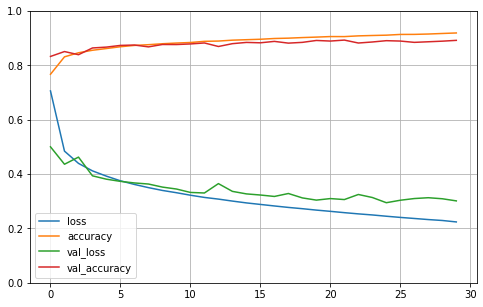

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Plot the training history
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [21]:
# Evaluate loss and accuracy score on testing data
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3268 - accuracy: 0.8854


[0.3267574906349182, 0.8853999972343445]

In the output array, the first part is the loss and the second is the accuracy score.

In [22]:
X_new = X_test[:3]

# Predict the class probability on the first 3 instances
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.01, 0.  , 0.97],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [23]:
# Predict the classes on the first 3 instances using the predict_classes method
y_pred = model.predict_classes(X_new)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 2, 1], dtype=int64)

In [25]:
import numpy as np

# Use NumPy because the TensorFlow method predict_classes(x) is deprecated
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

array([9, 2, 1], dtype=int64)

In [26]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [27]:
# Check labels on the first 3 instances
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

#### Building a Regression MLP using the Seuential API

In [28]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Fetch the California housing dataset
housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

In [29]:
scaler = StandardScaler()

# Perform scaling/regularization on the data
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [31]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

# Use MSE as the loss function
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 3ms/step - loss: 1.0540 - val_loss: 8.7522
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5502 - val_loss: 11.1382
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5331 - val_loss: 0.3947
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4161 - val_loss: 0.3729
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4003 - val_loss: 0.3628
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3920 - val_loss: 0.3596
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3848 - val_loss: 0.3519
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3774 - val_loss: 0.3609
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3727 - val_loss: 0.3801
Epoch 10/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3694 - val_loss: 0.370

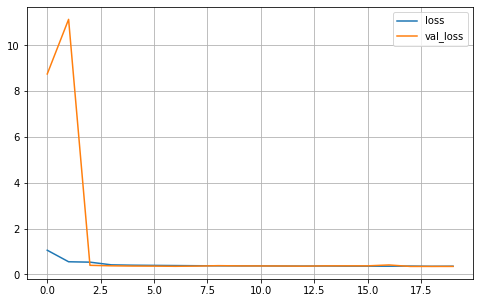

In [44]:
# Plot the training history
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.show()

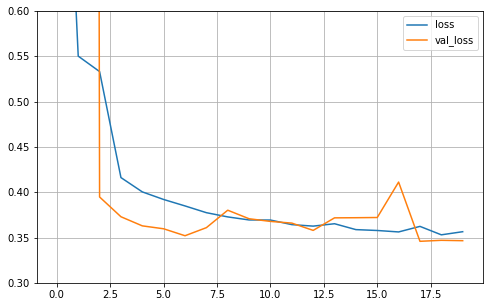

In [46]:
# Plot the training history
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0.3, 0.6) # set the vertical range to [0.3-0.6]
plt.show()

In [32]:
mse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.3523


In [36]:
X_new = X_test[:3] # pretend these are new instances
y_pred = model.predict(X_new)
y_pred.round(4)

array([[0.6575],
       [1.6086],
       [4.2596]], dtype=float32)

#### Building Complex Models using the Functional API

In [47]:
# Create an Input object as specification for the input type to the model
input_ = keras.layers.Input(shape=X_train.shape[1:])

# Create a Dense layer and pass in the input (tells Keras how it should connect the layers)
hidden1 = keras.layers.Dense(30, activation="relu")(input_)

# Create a Dense layer and pass in the output of the 1st layer
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)

# Create a Concatenate layer to concatenate the input and output from the 2nd layer
concat = keras.layers.Concatenate()([input_, hidden2])

# Create the output layer with a single neuron with input from the concat layer
output = keras.layers.Dense(1)(concat)

# Create a Keras model
model = keras.Model(inputs=[input_], outputs=[output])

This is "functional" because, when we create each layer, we call it like a function by passing in an input: we can tell Keras how the layers should be connected while no actual data is being processed yet.

In [48]:
# Specify the subset of features through the wide path and deep path
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

In [49]:
# Compile the model and fit
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 2.7104 - val_loss: 5.1649
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.8539 - val_loss: 1.0856
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6523 - val_loss: 0.6755
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5829 - val_loss: 0.5365
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5437 - val_loss: 0.5034
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5163 - val_loss: 0.4766
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4951 - val_loss: 0.4593
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4786 - val_loss: 0.4431
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4658 - val_loss: 0.4354
Epoch 10/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4559 - val_loss: 0.4316

In [50]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])

# Add an auxiliary output for regularization
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

In [51]:
# Specify loss and weight for each output
model.compile(loss=["mse", "mse"], 
              loss_weights=[0.9, 0.1], 
              optimizer="sgd")

In [52]:
history = model.fit(
    [X_train_A, X_train_B], [y_train, y_train], epochs=20,
    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 1s 4ms/step - loss: 0.8133 - main_output_loss: 0.6821 - aux_output_loss: 1.9943 - val_loss: 2.0761 - val_main_output_loss: 2.1571 - val_aux_output_loss: 1.3474
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5272 - main_output_loss: 0.4758 - aux_output_loss: 0.9895 - val_loss: 6.4621 - val_main_output_loss: 7.0752 - val_aux_output_loss: 0.9448
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5246 - main_output_loss: 0.4894 - aux_output_loss: 0.8412 - val_loss: 0.6378 - val_main_output_loss: 0.5656 - val_aux_output_loss: 1.2871
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4854 - main_output_loss: 0.4540 - aux_output_loss: 0.7680 - val_loss: 0.4718 - val_main_output_loss: 0.4319 - val_aux_output_loss: 0.8305
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4408 - main_output_loss: 0.4156 - aux_output_loss: 0.6671 - val_loss

In [53]:
# Evaluate the model
total_loss, main_loss, aux_loss = model.evaluate([X_test_A, X_test_B], [y_test, y_test])

162/162 [==============================] - 0s 1ms/step - loss: 0.3683 - main_output_loss: 0.3578 - aux_output_loss: 0.4627


In [54]:
# Predict for each output
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

#### Using the Subclassing API to Build Dynamic Models

In [55]:
class WideAndDeepModel(keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs) # handles standard args (e.g., name)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)

    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel()